# Episode 3 -- Summary Statistics

Problem: Given a bunch of datapoints, characterize the distribution in one or two values.

* Equivalent of an elevator pitch for a data sets
* Problem as posed inherently impossible
* Characterization should be robust to outliers

## Mean Value

The _mean value_ of $x_1, \dots, x_n$ is defined as

$$ \mu = mean(x_1, \dots, x_n) = \frac{1}{n} \sum_{i=1}^n x_i. $$

- Represnets center of mass
- If the values are close together this is a good representative

In [14]:
import math
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

mean= 1316.30863471


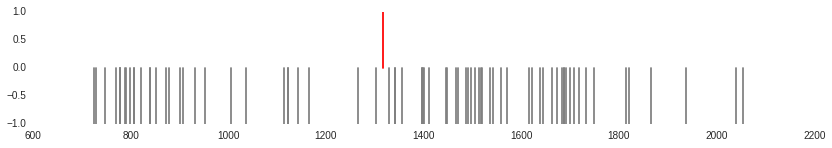

In [9]:
def mean(X):
    return float(sum(X)) / len(X)

X = np.loadtxt("DataSets/RequestRates.csv", delimiter=",")[:,1]
print "mean=", mean(X)

# Plot
def mark(m,height=1,style='r'):
    plt.plot([m,m],[0,height],style)

def plot_mean(X):
    sns.rugplot(X, color='grey', height=-1)
    mark(mean(X))
    plt.show()

plt.figure(figsize=(14,2))
plot_mean(X)

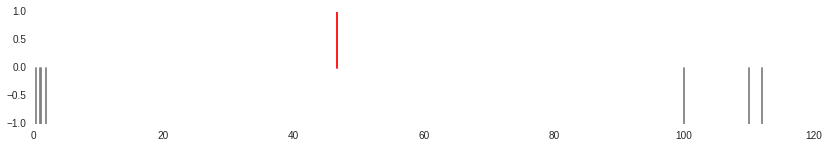

In [10]:
# Mean values can be atypical

plt.figure(figsize=(14,2))
plot_mean([1,2,0.4,1.2,100,110,112])

## Median

A _median value_ for $x_1, \dots, x_n$ is number $m$ such that
  
 $$ \# \{ i \,|\, x_i \leq m \} = \# \{ i \,|\, x_i \geq m \}. $$

So the number of samples smaller than $m$ is equal to the number of samples larger than $m$.
(Both should be roughly $n/2$).

A median can be computed as follows:

1. Let $S = sort(x_1, \dots, x_n)$, so that $s_1 \leq s_2 \leq \dots \leq s_n$.

2. If $n$ is odd then $m = s_{(n+1)/2}$ is the unique median.

3. If $n$ is even, and $a = floor(\frac{n+1}{2})$ and $b = ceil(\frac{n+1}{2})$ are the middle indices, then every number $m$ with 
  $$s_a \leq m \leq s_b$$
  is a median.
  
Remark:

* A Median always exists
* Median is not unique
* Can be computed in linear time
* Not influenced by outliers (robust)

In [33]:
# Median Implementation

# Caution: Index start at 0 in python!
def median_min(X):
    S = sorted(X)
    n = len(X)
    return S[int(math.floor((n+1)/2.))-1]

def median_max(X):
    S = sorted(X)
    n = len(X)
    return S[int(math.ceil((n+1)/2.))-1]

def plot_median_range(X):
    mark(median_max(X),1,'b')
    mark(median_min(X),1,'b')
    plt.plot([median_min(X),median_max(X)],[0.5,0.5],'b--')


def plot_mean_median(X):
    plt.figure(figsize=(14,2))
    sns.rugplot(X, color='grey', height=-1)
    mark(mean(X),1, 'r-')
    plot_median_range(X)
    plt.show()

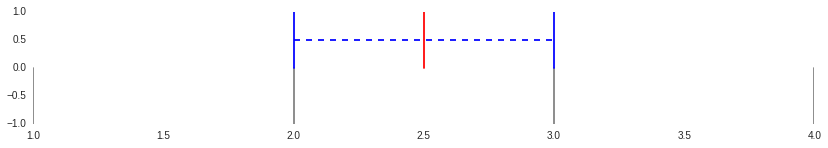

In [34]:
# even case
plot_mean_median([1,2,3,4])

# Application: Plotting

* A monitoring graph rarely shows you the full data: Not enough pixels!
* Need to choose an summary statistic to pre-aggregate the data.
* Common choice: mean

## Meet Peak Erosion

Demo: https://parlette.circonus.com/trending/graphs/view/65d896dd-2be3-4be9-a76d-6fec209358b1

<figure>
<img src="img/peak_erosion_1.png" width="50%">
<img src="img/peak_erosion_2.png" width="50%">
<figcaption>Peak erosion: Same peak is shown with height 0.08 and 0.03</figcaption>
</figure>

To avoid peak erosion, use max-aggregation.

<figure>
<img src="img/peak_erosion_3.png" width="80%">
<figcaption>Peak erosion: Same peak is shown with height 0.08 and 0.03</figcaption>
</figure>


# Deviation Measures

1. The _maximal deviation_ is defined as

$$ maxdev(x_1,\dots,x_n) = max \{ |x_i - \mu| \,|\, i=1,\dots,n\}.$$

2. The _mean absolute deviation_ is defined as

$$ mad(x_1,\dots,x_n) = \frac{1}{n} \sum_{i=1}^n |x_i - \mu|.$$

3. The _standard deviation_ is defined as

$$ \sigma = stddev(x_1,\dots,x_n) =  \sqrt{\frac{1}{n} \sum_{i=1}^n (x_i - \mu)^2}.$$


* Measure the 'typical' displacement from the mean value.
* Standard deviation is popular because it has extremely nice mathematical properties.

In [32]:
def max_dev(X):
    m = mean(X)
    return max(abs(x - m) for x in X)

def mad(X):
    m = mean(X)
    return sum(abs(x - m) for x in X) / float(len(X))

def stddev(X):
    m = mean(X)
    return math.pow(sum((x - m)**2 for x in X) / len(X), 0.5)

# Plotting helper function
def plot_mean_dev(X, m, s, new_canvas=True):
    print "mean = ", m
    print "dev  = ", s
    if new_canvas: plt.figure(figsize=(14,1))
    sns.rugplot(X, color='grey')
    plt.plot([m,m],[0,-0.09],'r-' )
    plt.plot([m-s,m-s],[0,-0.08],'b-')
    plt.plot([m+s,m+s],[0,-0.08],'b-')
    plt.plot([m-s,m+s],[-0.04,-0.04],'b--')
    if new_canvas:  plt.show()

Maximal deviation
mean =  1316.30863471
dev  =  738.072957089


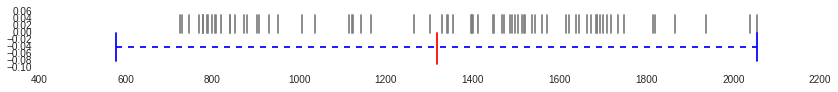

Standard Deviation
mean =  1316.30863471
dev  =  374.572363954


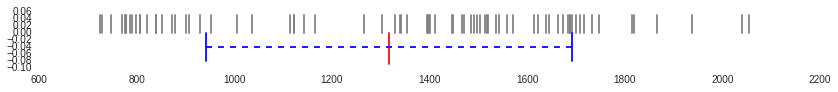

Mean Absolute Deviation
mean =  1316.30863471
dev  =  327.4656915


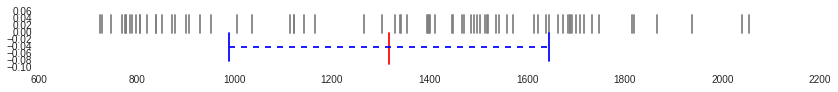

In [19]:
X = np.loadtxt("DataSets/RequestRates.csv", delimiter=",")[:,1]
    
print "Maximal deviation"
plot_mean_dev(X,mean(X),max_dev(X))

print "Standard Deviation"
plot_mean_dev(X,mean(X),stddev(X))

print "Mean Absolute Deviation"
plot_mean_dev(X,mean(X),mad(X))

mean =  0.00493680998218
dev  =  1.00554048134


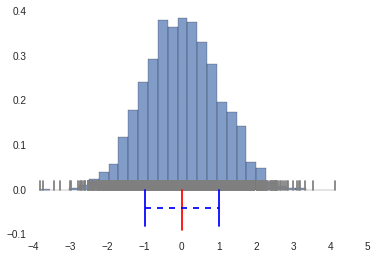

In [30]:
# Standard deviation is a good deviation for normal distributed data
X = [ np.random.normal() for x in range(3000) ]
plt.hist(X, bins=30, alpha=0.7, normed=True)
plot_mean_dev(X,mean(X),stddev(X), False)

mean =  0.0715796167766
dev  =  3.78610166623


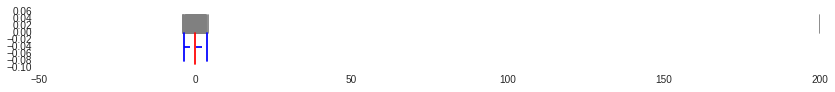

In [31]:
# Large effect on Outliers
X = X + [200]
plot_mean_dev(X,mean(X),stddev(X))

## Caution with Standard Deviation

- Everybody Learns about standard deviation in school
- Beautiful mathematical properties!
- Everybody knows 
  - "68% of data falls within 1 std-dev of the mean"
  - "95% falls within 2 std-dev of the mean"
  - "99.7" falls within 3 std-dev of the mean"
* "Problem is: this is utter nonsense". Only true for normally distributed data.

* Not good for measuring outliers!


_Source:_ Janert - Data Analysis with Open Source Tools

## War Story:

- Looking at SLA for DB response times
- Outlier defined as value larger than $\mu + 3\sigma$
- Look at code: Takes '0.3' percentile!
- So always have outliers.
- And 0.3-percentile was way too large (hours of latency).
- Programmer changed code for 1%, 5%, 10% quantiles.
- Finally handcoded a threshold
- The SLA was never changed

Source: Janert - Data Analysis with Open Source Tools